In [1]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
data_df = pd.read_csv('../data/initial_measures_compliance_demo.csv')
print data_df.shape
data_df.head()

(629, 42)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age
0,10001,1940-12-22,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12,53,2015-07-13,0.773585,147.0,68.0,55.0,269.2,97.0,57.0,27231 days 00:00:00.000000000
1,10002,1933-04-24,0.0,0.0,NaN,1.0,0.0,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,24,50,2015-08-10,0.520000,135.0,74.0,69.0,195.8,96.0,62.0,30058 days 00:00:00.000000000
2,10004,1948-12-15,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1,2,2015-12-21,0.500000,110.0,75.0,72.0,252.0,97.0,71.0,24477 days 00:00:00.000000000
3,10006,1948-11-28,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,24,51,2015-07-20,0.529412,122.0,78.0,61.0,250.7,97.0,60.0,24340 days 00:00:00.000000000
4,10009,1927-10-06,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9,53,2015-07-13,0.830189,144.0,86.0,72.0,152.1,93.0,71.0,32057 days 00:00:00.000000000


In [168]:
print data_df.columns

Index([u'pin', u'd.o.b.', u'medicaid', u'hospitalized', u'rpm_hospitalized',
       u'rpm_falls', u'rehospitalized', u'rpm_rehospitalized', u'chf', u'copd',
       u'diabetes', u'hypertension', u'stroke', u'hypoglycemia', u'falls',
       u'liver_disease', u'hypotension', u'obesity',
       u'coronary_artery_disease', u'fractures', u'renal', u'alzheimers',
       u'depression', u'status_active', u'gender_f', u'gender_m',
       u'lang_english', u'lang_other', u'lang_spanish', u'caregiver',
       u'live_alone', u'missed_wks', u'total_wks', u'first_measure_date',
       u'compliance', u'systolic', u'diastolic', u'heartrate', u'weight',
       u'spo2', u'heartrate_spo2', u'age'],
      dtype='object')


In [169]:
chronic_conds = [u'chf', u'copd',
       u'diabetes', u'hypertension', u'stroke', u'hypoglycemia', u'falls',
       u'liver_disease', u'hypotension', u'obesity',
       u'coronary_artery_disease', u'fractures', u'renal', u'alzheimers',
       u'depression']
data_df['n_conds']=data_df[chronic_conds].apply(lambda x: x.sum(),axis=1)

In [172]:
data_df['n_conds'].value_counts()

0     246
1     183
2     114
3      59
4      20
5       3
6       2
10      1
7       1
Name: n_conds, dtype: int64

In [173]:
data_df[data_df['n_conds']==0]

,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,n_conds
13,10029,1932-03-21,1.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,NaN,NaN,4,20,2016-03-10,0.800000,111.0,54.0,61.0,153.9,98.0,86.0,30670 days 00:00:00.000000000,0
17,10044,1938-04-20,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,21,55,2015-07-09,0.618182,106.0,65.0,70.0,131.0,96.0,64.0,28204 days 00:00:00.000000000,0
21,10051,1933-11-26,NaN,NaN,1.0,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,0,0,2015-10-08,NaN,142.0,87.0,72.0,151.0,98.0,113.0,29901 days 00:00:00.000000000,0
23,10061,1931-08-04,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10,27,2015-10-26,0.629630,130.0,69.0,75.0,185.2,94.0,74.0,30764 days 00:00:00.000000000,0
24,10062,1957-01-22,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,2016-01-04,NaN,155.0,93.0,87.0,189.0,99.0,83.0,21531 days 00:00:00.000000000,0
27,10065,1940-11-20,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10,16,2016-03-03,0.375000,117.0,76.0,75.0,153.0,96.0,74.0,27497 days 00:00:00.000000000,0
28,10066,1933-07-08,1.0,NaN,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,20,2016-03-10,0.800000,129.0,74.0,66.0,135.1,96.0,68.0,30196 days 00:00:00.000000000,0
29,10069,1957-02-05,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9,15,2016-04-04,0.400000,157.0,89.0,60.0,126.8,98.0,62.0,21608 days 00:00:00.000000000,0
30,10070,1932-03-29,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9,16,2016-03-28,0.437500,152.0,72.0,77.0,172.8,95.0,72.0,30680 days 00:00:00.000000000,0
31,10071,1930-03-28,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,2016-04-04,NaN,142.0,81.0,61.0,187.0,98.0,60.0,31419 days 00:00:00.000000000,0


In [3]:
print data_df.shape
print 'Drop all NA', data_df.dropna().shape
print data_df.count()

(629, 42)
Drop all NA (24, 42)
pin                        629
d.o.b.                     521
medicaid                   459
hospitalized               520
rpm_hospitalized            97
rpm_falls                   56
rehospitalized             518
rpm_rehospitalized          95
chf                        629
copd                       629
diabetes                   629
hypertension               629
stroke                     629
hypoglycemia               629
falls                      629
liver_disease              629
hypotension                629
obesity                    629
coronary_artery_disease    629
fractures                  629
renal                      629
alzheimers                 629
depression                 629
status_active              629
gender_f                   629
gender_m                   629
lang_english               629
lang_other                 629
lang_spanish               629
caregiver                  515
live_alone                 515
missed_w

In [4]:
data_df['rpm_hospitalized'].value_counts(dropna=False)

NaN     532
 1.0     95
 0.0      2
Name: rpm_hospitalized, dtype: int64

In [5]:
data_df['rpm_rehospitalized'].value_counts(dropna=False)

NaN     534
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64

### Recode NANs from rpm columns to 0 (No)

In [106]:
for col in [u'rpm_hospitalized',u'rpm_falls']:
    data_df[col]=data_df[col].replace([0,1,np.nan],[0,1,0])
print data_df['rpm_hospitalized'].value_counts(dropna=False)
print data_df['rpm_rehospitalized'].value_counts(dropna=False)
print data_df['alzheimers'].value_counts(dropna=False)
print data_df['hypotension'].value_counts(dropna=False)
print data_df['renal'].value_counts(dropna=False)
print data_df['fractures'].value_counts(dropna=False)
print data_df['falls'].value_counts(dropna=False)

0.0    534
1.0     95
Name: rpm_hospitalized, dtype: int64
NaN     534
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64
0    623
1      6
Name: alzheimers, dtype: int64
0    626
1      3
Name: hypotension, dtype: int64
0    620
1      9
Name: renal, dtype: int64
0    621
1      8
Name: fractures, dtype: int64
0    613
1     16
Name: falls, dtype: int64


In [153]:
new_data = data_df.drop(['pin', 'd.o.b.', 'rpm_rehospitalized', 'rpm_falls', 'gender_m', 'alzheimers','hypotension','lang_other',
                         'missed_wks', 'total_wks', 'first_measure_date', 'status_active','lang_english','heartrate_spo2',
                        'hypoglycemia','fractures','renal','liver_disease'], axis = 1)
new_data.dropna(inplace=True)
new_data.reset_index(drop=True,inplace=True)
print new_data.shape
new_data.dtypes

(388, 24)


medicaid                   float64
hospitalized               float64
rpm_hospitalized           float64
rehospitalized             float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
falls                        int64
obesity                      int64
coronary_artery_disease      int64
depression                   int64
gender_f                   float64
lang_spanish               float64
caregiver                  float64
live_alone                 float64
compliance                 float64
systolic                   float64
diastolic                  float64
heartrate                  float64
weight                     float64
spo2                       float64
age                         object
dtype: object

In [154]:
new_data['age']=new_data['age'].apply(lambda x: pd.tslib.Timedelta(x).days)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002837CA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000030B21278>]], dtype=object)

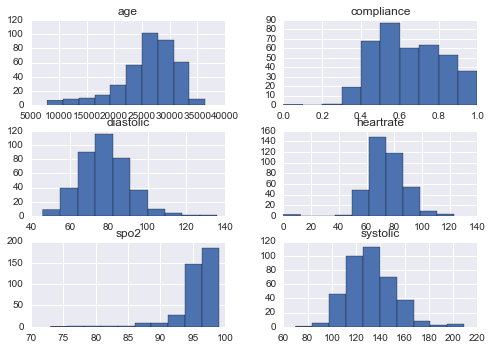

In [155]:
#continuous_feats = ['age','heartrate_spo2','spo2','heartrate','diastolic','systolic']
continuous_feats = ['age','compliance','spo2','heartrate','diastolic','systolic']

new_data[continuous_feats].hist()

In [156]:
new_data[continuous_feats].describe()

,age,compliance,spo2,heartrate,diastolic,systolic
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,26128.041237,0.643278,95.659794,73.992268,77.448454,131.917526
std,5218.618294,0.182745,3.216195,14.257414,12.483992,19.630525
min,7890.000000,0.000000,73.000000,0.000000,46.000000,70.000000
25%,23955.250000,0.500000,95.000000,66.000000,69.000000,119.000000
50%,27084.000000,0.622796,96.000000,73.000000,77.000000,130.000000
75%,29795.750000,0.791667,97.000000,82.250000,85.000000,143.250000
max,36391.000000,1.000000,99.000000,123.000000,136.000000,209.000000


In [157]:
# For each feature find the data points with extreme high or low values
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(new_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(new_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))]).index
    display(new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
170,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.500000,112.0,72.0,63.0,185.4,99.0,13576
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306
179,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.513514,142.0,97.0,104.0,185.6,97.0,13362
180,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.423077,118.0,90.0,82.0,195.3,99.0,10058
196,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.500000,108.0,74.0,74.0,204.4,98.0,9947
200,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217
206,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,98.0,63.0,67.0,135.0,99.0,13963
210,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.720000,102.0,67.0,85.0,132.9,99.0,10636
213,1.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.648649,142.0,101.0,70.0,196.9,94.0,15178
216,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480


Data points considered outliers for the feature 'compliance':
Int64Index([137], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
137,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,92.0,71.0,69.0,116.0,97.0,24288


Data points considered outliers for the feature 'spo2':
Int64Index([ 31,  87, 120, 142, 151, 160, 182, 191, 228, 232, 241, 242, 273,
            286, 287, 289, 290, 295, 314, 323, 328, 329, 339, 342, 350, 358,
            371],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
31,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.943396,90.0,72.0,87.0,159.8,88.0,34190
87,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.460000,118.0,52.0,57.0,111.0,80.0,32282
120,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,0.872727,136.0,77.0,89.0,134.9,87.0,26130
142,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.400000,152.0,90.0,71.0,119.3,88.0,28871
151,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.773585,122.0,72.0,87.0,179.7,87.0,30396
160,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.631579,121.0,58.0,78.0,147.0,90.0,26255
182,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174
191,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915
228,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161
232,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.833333,133.0,89.0,73.0,189.2,82.0,11948


Data points considered outliers for the feature 'heartrate':
Int64Index([74, 174, 177, 193, 203, 209, 297, 309, 313, 366], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
74,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.607843,120.0,86.0,123.0,178.1,97.0,29497
174,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,112.0,80.0,107.0,215.8,94.0,21289
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306
193,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,0,1.0,0.0,0.0,1.0,0.392857,159.0,102.0,109.0,229.3,97.0,24697
203,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.550000,127.0,103.0,113.0,202.4,97.0,22674
209,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.585366,144.0,96.0,109.0,145.1,99.0,20329
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759
309,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.754098,140.0,66.0,0.0,159.0,97.0,31184
313,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.512195,159.0,80.0,118.0,97.2,96.0,31375
366,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.750000,131.0,62.0,0.0,158.0,93.0,32681


Data points considered outliers for the feature 'diastolic':
Int64Index([226, 230, 231, 336, 349], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
226,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.428571,150.0,110.0,81.0,260.4,97.0,14833
230,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.523810,145.0,136.0,64.0,185.8,98.0,21522
231,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.600000,154.0,118.0,84.0,159.0,98.0,13696
336,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,0.559322,157.0,111.0,85.0,219.4,94.0,29670
349,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.791667,164.0,114.0,63.0,156.0,97.0,32234


Data points considered outliers for the feature 'systolic':
Int64Index([17, 30, 95, 185, 235, 284, 346, 359, 361], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age
17,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.857143,199.0,101.0,71.0,133.0,97.0,28114
30,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.711538,205.0,91.0,72.0,172.0,94.0,27544
95,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.860000,182.0,94.0,69.0,259.9,96.0,26636
185,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564
235,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417
284,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.285714,180.0,82.0,62.0,165.6,93.0,33327
346,1.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.842105,70.0,48.0,58.0,161.6,96.0,25738
359,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019
361,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.769231,209.0,95.0,61.0,160.9,94.0,31769


In [159]:
# OPTIONAL: Select the indices for data points you wish to remove
age_outliers  = [187, 195, 197, 198, 217, 219, 222, 228, 232, 238, 240, 241, 243,
            244, 248, 251, 256, 257, 261, 262, 291, 298]
spo2_outliers = [200,210]
hr_outliers = [329, 344, 407, 409]
compl_outliers = [151]
outliers = [137, 170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269,182,191,297, 309, 366]
#outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers
# Remove the outliers, if any were specified
good_data = new_data.drop(new_data.index[outliers]).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030D199B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000316C1748>]], dtype=object)

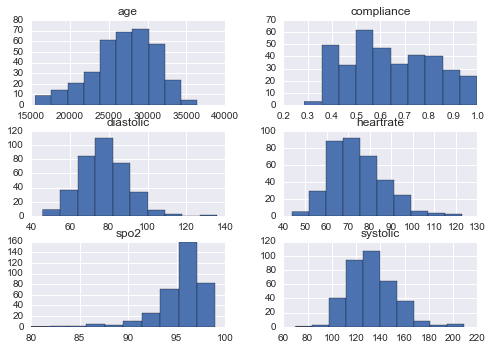

In [160]:
good_data[continuous_feats].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000319104A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003228D320>]], dtype=object)

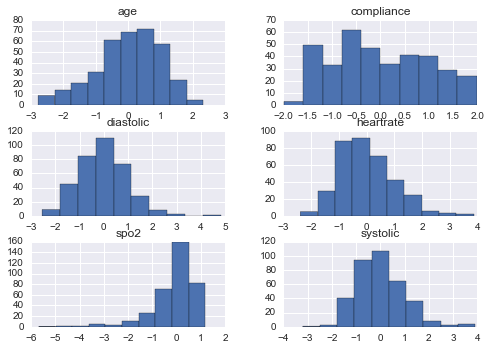

In [161]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
nrmlzr = Normalizer()
stdsclr = StandardScaler()
#good_data[continuous_feats] = nrmlzr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats] = stdsclr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats].hist()

In [162]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['rpm_hospitalized'],axis=1), good_data['rpm_hospitalized'], stratify=good_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
print score

0.810810810811


In [163]:
from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],index=new_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['log coef']=np.exp(lr_result['coef'])
lr_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.806153846154
<function _passthrough_scorer at 0x000000000E1493C8>
0.810810810811


,coef,log coef
medicaid,0.003633,1.003640
hospitalized,0.000387,1.000387
rehospitalized,0.000342,1.000342
chf,0.000647,1.000647
copd,-0.000122,0.999878
diabetes,0.000040,1.000040
hypertension,0.000809,1.000810
stroke,0.000597,1.000597
falls,0.000450,1.000450
obesity,0.000117,1.000117


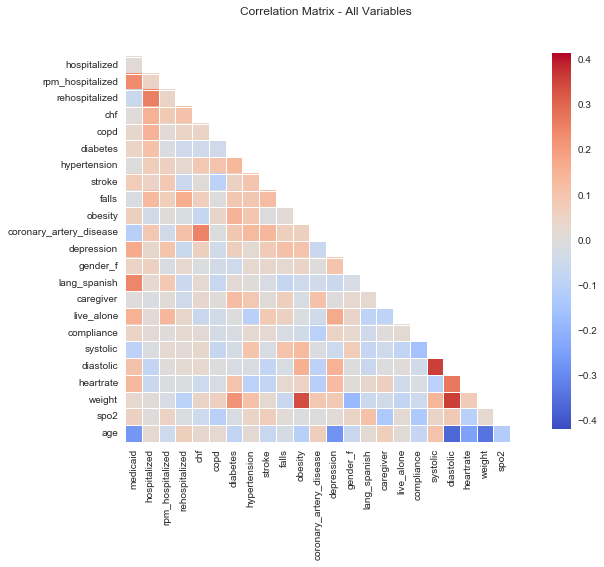

In [164]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(good_data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [165]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.432991
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  325
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                           23
Date:                Wed, 17 Aug 2016   Pseudo R-squ.:                  0.1195
Time:                        17:32:37   Log-Likelihood:                -140.72
converged:                       True   LL-Null:                       -159.82
                                        LLR p-value:                   0.02427
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                      -2.4710      0.967     -2.556      0.011        -4.366 

In [166]:
print result.conf_int()

                                0         1
const                   -4.366010 -0.575967
medicaid                 0.391757  1.736783
hospitalized            -0.712729  0.706977
rehospitalized          -0.516544  2.432949
chf                     -0.537180  2.422067
copd                    -1.072324  0.804519
diabetes                -0.825505  0.655970
hypertension            -0.261130  1.018535
stroke                  -0.785745  1.633168
falls                   -0.833032  2.902469
obesity                 -1.377443  0.974272
coronary_artery_disease -1.946277  0.574817
depression              -0.494845  1.699819
gender_f                -1.155346  0.405120
lang_spanish            -0.344939  1.249486
caregiver               -1.130092  1.868926
live_alone              -0.027728  1.531369
compliance              -0.270177  0.333303
systolic                -0.156329  0.533064
diastolic               -0.487467  0.302860
heartrate               -0.351700  0.309633
weight                  -0.01045

In [167]:
print np.exp(result.params)

const                      0.084501
medicaid                   2.898723
hospitalized               0.997128
rehospitalized             2.607005
chf                        2.566244
copd                       0.874675
diabetes                   0.918726
hypertension               1.460389
stroke                     1.527621
falls                      2.814314
obesity                    0.817434
coronary_artery_disease    0.503722
depression                 1.826656
gender_f                   0.687212
lang_spanish               1.571881
caregiver                  1.446891
live_alone                 2.120857
compliance                 1.032067
systolic                   1.207277
diastolic                  0.911828
heartrate                  0.979186
weight                     0.998881
spo2                       1.099255
age                        0.911722
dtype: float64


for all the factors, we can see that being previously hospitalized increases the odd to be rpm_hospitalized by 12%. Larger factors are live_alone (210%), lang_spanish(117%), depression(108%), chf(117%), and rehospitalized(116%). For continuous variables, a unit increase in that value yields the corresponding increase in 

In [59]:
print result.mle_retvals

{'fopt': 0.42210151480731628, 'score': array([ -2.22414112e-13,  -6.78611904e-14,   2.63933388e-18,
        -9.62542929e-14,  -1.54526017e-13,  -1.05398989e-13,
        -8.43054324e-16,  -8.51398025e-19,  -6.78569334e-14,
        -1.79564322e-11,  -2.35134917e-48,  -1.70279605e-18,
        -6.13534445e-14,   5.95978618e-19,  -1.02167763e-18,
        -1.71356639e-59,   8.51398025e-20,  -2.58933979e-13,
        -9.62679152e-14,  -1.15459848e-11,  -1.54094869e-13,
        -4.26720690e-16,  -2.84421430e-13,  -2.18735732e-13,
        -4.17336186e-11,  -2.57512893e-11,  -2.46461556e-11,
        -6.75357357e-11,  -3.07636234e-11,  -2.45454591e-11,
        -8.02698821e-09]), 'iterations': 35, 'converged': False, 'warnflag': 1, 'Hessian': array([[ -3.63913798e-02,  -5.64883035e-03,  -3.98375629e-03,
         -6.95879766e-03,  -8.96230040e-03,  -2.39918820e-02,
         -3.04034541e-03,  -6.38469733e-04,  -1.19918353e-03,
         -1.10524935e-11,  -0.00000000e+00,  -1.90960031e-03,
         -3.